# Clustering

In [94]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
df_orl = pd.read_csv("data/parameter_igt_orl.csv")
df_orl["subjID_label"] = df_orl["subjID"].astype("category").cat.codes # number label for old/young
df_orl.head()

,subjID,A+,A-,K,BetaF,BetaP,A+-A-,subjID_label
0,old,0.324444,0.068862,1.502130,2.523191,-5.547480,0.255581,0
1,old,0.885744,0.120145,0.012591,3.193244,-9.159800,0.765598,0
2,old,0.318205,0.078128,1.927309,0.615708,9.272336,0.240077,0
3,old,0.728192,0.106737,0.388407,2.595746,-2.239555,0.621455,0
4,old,0.356229,0.091987,1.810674,0.508605,9.825699,0.264241,0


## K-Means
### K Means Clustering for BetaF and BetaP vs Old and Young

Here we are investigating the clustering between two of the paramaters of the model. BetaF relates to the person's outcome frequency. Furthermore, when this parameter is less than zero it means the person prefers decks of low win frequency, and a high BetaF score means that they prefer decks with a high win frequency. BetaP is the parameter which accounts for the participant's perseverence in choosing decks. Values less than zero indicate a tendency to switch between decks and values greater than zero means the participant likes to stick with the same deck more often.

In [16]:
kmeans_betas = KMeans(n_clusters=3).fit(df_orl[["BetaF", "BetaP"]])
centroids_betas = kmeans_betas.cluster_centers_

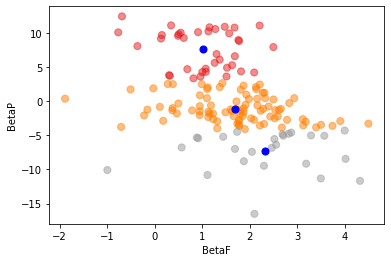

In [19]:
plt.scatter(df_orl['BetaF'], df_orl['BetaP'], c= kmeans_betas.labels_, cmap = "Set1", s=50, alpha=0.5)
plt.scatter(centroids_betas[:, 0], centroids_betas[:, 1], c='blue', s=50)
plt.xlabel('BetaF')
plt.ylabel('BetaP')
plt.show()

There are clearly three defined clusters when plotting these two parameters with the data. Let's compare this with the plot showing young vs old participants.

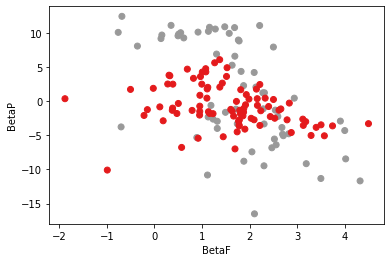

In [33]:
scatter = plt.scatter(df_orl['BetaF'], df_orl['BetaP'], c=df_orl['subjID_label'], cmap="Set1_r")
plt.xlabel('BetaF')
plt.ylabel('BetaP')
plt.show()
#have to find out how to show legend for young and old

#This next section could go under different headings and could go in Findings/Results/Conclusions etc. Inserting here now as
#it is easy to see with plots just above it
#Wording could be improved but will be refined later

### BetaP Cluster Findings

This second plot helps to understand the clusters in the first graph more clearly now. The clusters are primarily based on three different groups of participants and their balues for BetaP, the perseverence parameter. The old people are mainly split into two clusters: those with a high value for perseverence and those with a low value for perseverence. The middle cluster consists mainly of young people, whose values for perseverence are more neutral, lying between +-5 in BetaP.

In [12]:
df_orl[df_orl.BetaF >= 0].shape[0]        

143

### BetaK Cluster Findings

As expected, most participants prefer a higher winning frequency, with 143 of the 153 participants having a BetaF score greater than 0. The outcome frequency value is also noticeable between the clusters. The cluster of primarily old people with a high perseverence score has lower average outcome frequency than the group of primarily old people with a low perseverence score. The central cluster of mainly young people is more neutral, with the majority of the participants having values between 0 and 3.

## Hierarchical Agglomerative
### Cluster based on the A+ and A- columns only

Using just the two A parameters, we see two clusters clearly split between high and low values for A+ and a mix across A-.

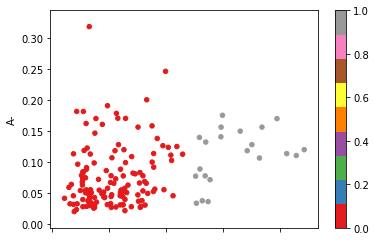

In [80]:
agg_cluster_A = AgglomerativeClustering().fit(df_orl[["A+", "A-"]])
df_orl.plot.scatter("A+", "A-", c=agg_cluster_A.labels_, cmap="Set1")
plt.set_xlabel("A+")
plt.show()

These two clusters do not however show much separation for the other parameters. Looking at the 9 boxes in the lower right of the plot, we see that the two clusters are almost completely overlapping.

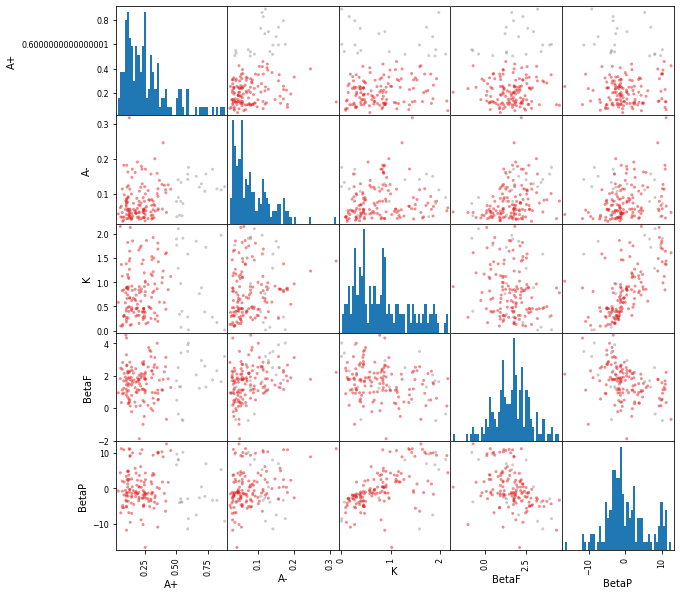

In [82]:
pd.plotting.scatter_matrix(df_orl[["A+", "A-", "K", "BetaF", "BetaP"]], figsize=(10,10), hist_kwds=dict(bins=50), c=agg_cluster_A.labels_, cmap="Set1")
plt.show()

### Cluster with all parameters

When we cluster using all of the available parameters, there is initially no clear separation when comparing the previous A+ and A- parameters.

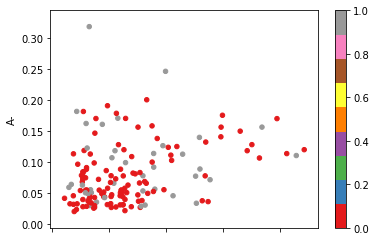

In [84]:
agg_cluster_all = AgglomerativeClustering().fit(df_orl[["A+", "A-", "K", "BetaF", "BetaP"]])
df_orl.plot.scatter("A+", "A-", c=agg_cluster_all.labels_, cmap="Set1")
plt.set_xlabel("A+")
plt.show()

However when we compare all parameters, we see clear separation across a number of parameters in particular $\beta_P$. There is also some level of distiction between the clusters for K and $\beta_F$ parameters.

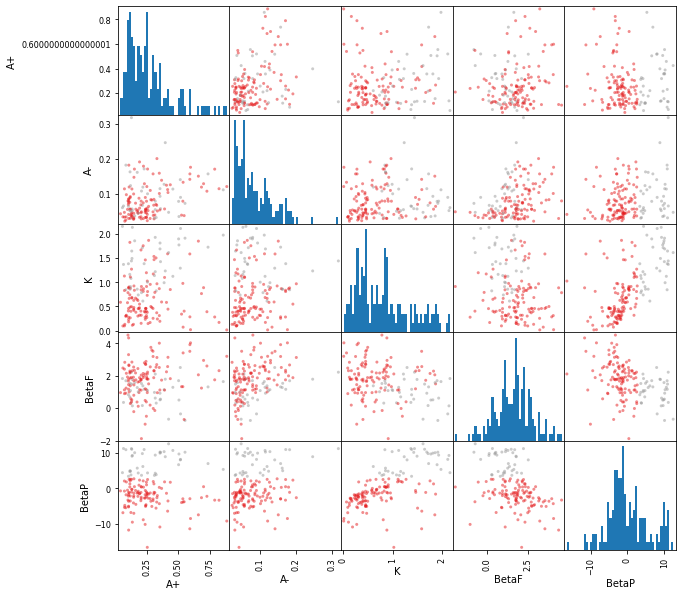

In [26]:
pd.plotting.scatter_matrix(df_orl[["A+", "A-", "K", "BetaF", "BetaP"]], figsize=(10,10), hist_kwds=dict(bins=50), c=agg_cluster_all.labels_, cmap="Set1")
plt.show()

### Clustering the old group

Clustering on the old group, there is a clear separation based on the BetaP parameter. The other parameters seem to be well mixed between the clusters, meaning there's no significant difference to cluster based on.

In [30]:
df_orl_old = df_orl[df_orl["subjID"] == "old"]
agg_cluster_old = AgglomerativeClustering().fit(df_orl_old[["A+", "A-", "K", "BetaF", "BetaP"]])
agg_cluster_old.labels_

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

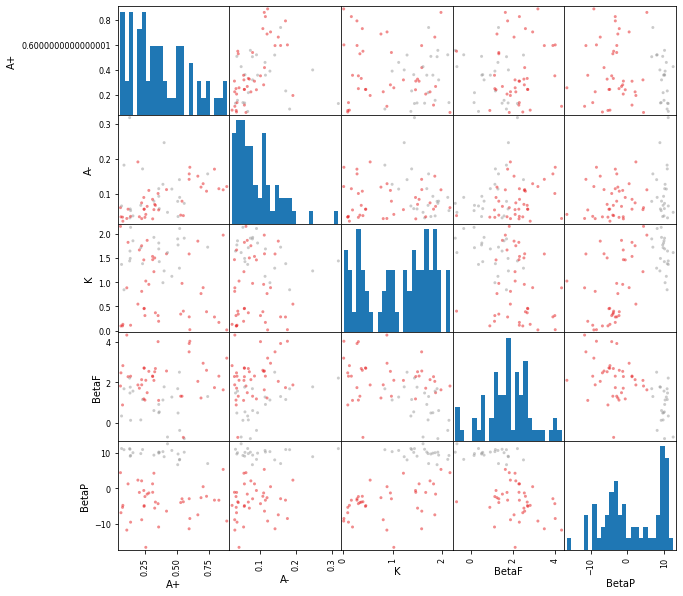

In [32]:
pd.plotting.scatter_matrix(df_orl_old[["A+", "A-", "K", "BetaF", "BetaP"]], figsize=(10,10), hist_kwds=dict(bins=25), c=agg_cluster_old.labels_, cmap="Set1")
plt.show()

### Using more than two clusters

In [86]:
agg_cluster3 = AgglomerativeClustering(n_clusters=3).fit(df_orl[["A+", "A-", "K", "BetaF", "BetaP"]])
agg_cluster3.labels_

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 2, 0, 0,
       0, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 2, 1, 0,
       2, 0, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1])

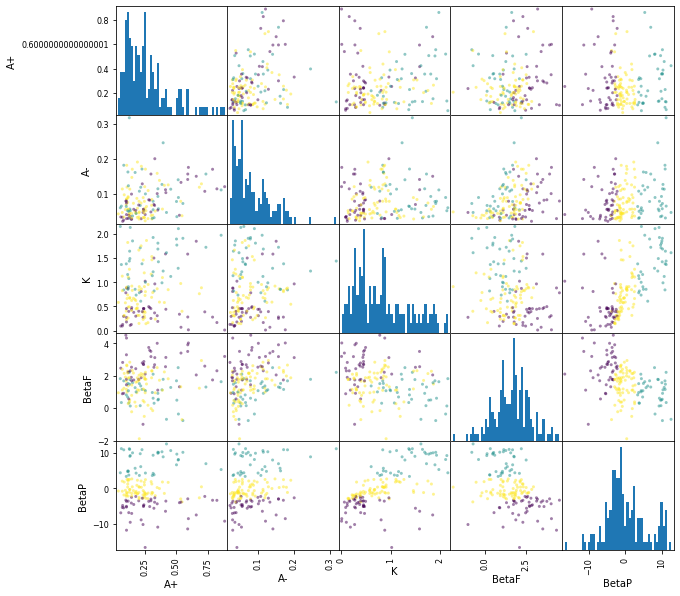

In [87]:
pd.plotting.scatter_matrix(df_orl[["A+", "A-", "K", "BetaF", "BetaP"]], figsize=(10,10), hist_kwds=dict(bins=50), c=agg_cluster3.labels_, cmap="viridis")
plt.show()

There seems to be much better clusters for the BetaF & BetaP parameters.

In [ ]:
## Evaluating the clusters
### Elbow method (K-Means)
The first cluster evaluation method is K-means. Here, we plot the variation against the number of clusters in the data, and picking the "elbow" of the curve as the number of clusters to use for the analysis.
The principle for calculating the distortion for each number of cluster stems back to Sum of Squared Error between points and their clusters.


$$SSE =\sum_{i=1}^{n} {(y_i - ŷ_i)^2}$$

The elbow method shows that for these parameters the optimal number of clusters for K-means is 2/3.

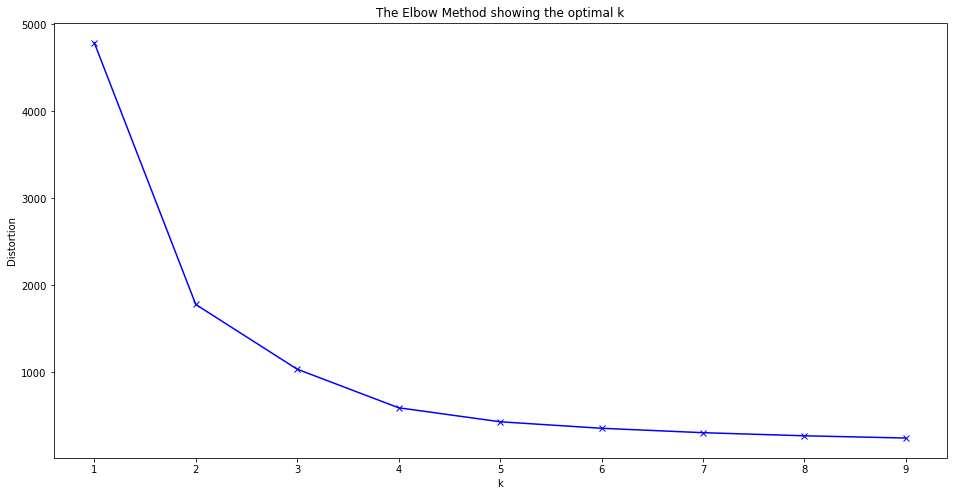

In [36]:
df1 = df_orl[["A+", "A-", "K", "BetaF", "BetaP"]]
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df1)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Silhouette Analysis
Silhouette analysis is another method of checking cluster validation. It does so by checking how similar each point is to its own cluster compared to other clusters. Again, it does so through Euclidean distance. The silhouette metric ranges from -1 to +1, where a high value indicates an object has been matched well to its own cluster and is poorly matched with neighbouring clusters.

Silhouette coefficient exhibits a peak characteristic as compared to the gentle bend in the elbow method. This is easier to visualize and reason with. In the above graph, you could understand that the optimal number of clusters is either 2 or 3. The peak in the silhouette coefficient graph will eliminate this uncertainty.

The equation for this coefficient is below

$$a(i) = \frac{1}{|C_i-1|}  \sum_{j \epsilon C_i, i≠j}{d(i, j)} $$

where $$a(i)$$ is the measure of how well a point is assigned to its cluster. The smaller the value, the better assigned it is to its cluster.

$${d(i, j)}$$ is the distance between points i and j within cluster $$C_i$$

#### K-Means
For K-Means clustering, we see peaks in silhouette score at 2 and 4 clusters. 

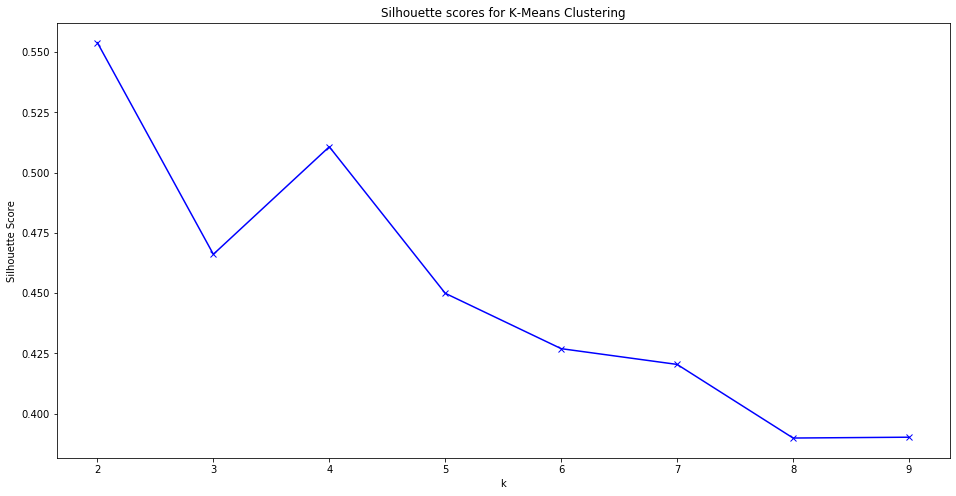

In [102]:
df1 = df_orl[["A+", "A-", "K", "BetaF", "BetaP"]]
silhouettes = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df1)
    silhouettes.append(silhouette_score(df1, kmeanModel.labels_))

plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel("Silhouette Score")
plt.title('Silhouette scores for K-Means Clustering')
plt.show()

#### Hierarchical Agglomerative
For Hierarchical Agglomerative clustering, we see a single peak in silhouette score at 2 clusters. This is slightly higher than k-means at two clusters, but lower for all other number of clusters.  

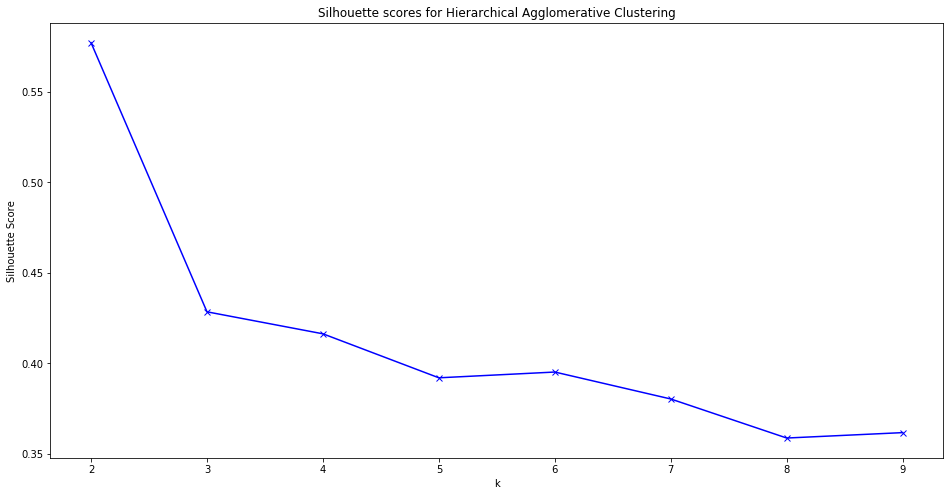

In [103]:
df1 = df_orl[["A+", "A-", "K", "BetaF", "BetaP"]]
silhouettes = []
K = range(2,10)
for k in K:
    kmeanModel = AgglomerativeClustering(n_clusters=k)
    kmeanModel.fit(df1)
    silhouettes.append(silhouette_score(df1, kmeanModel.labels_))

plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel("Silhouette Score")
plt.title('Silhouette scores for Hierarchical Agglomerative Clustering')
plt.show()

### Using clusters to classify age

In [70]:
def confusion_matrix(labels_a, labels_b):
    cm = np.zeros((max(labels_a) + 1, max(labels_b) + 1))
    np.add.at(cm, (labels_a, labels_b), 1)
    return cm

#### K-Means (k=2)

#### K-Means (k=3)
With three clusters, K-means successfully clusters the majority of the young participants in a single group. We also see however that the old group is distributed across all three clusters. This lines up with what we see in the data, the parameters for the old participants are much more spread out. 

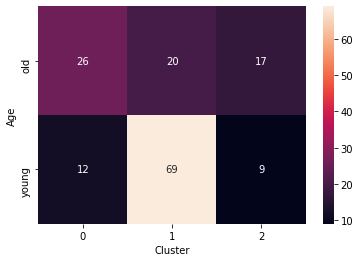

In [92]:
cm = confusion_matrix(df_orl["subjID_label"].values, kmeans_betas.labels_)

fig, ax = plt.subplots()
sn.heatmap(cm, ax=ax, annot=cm)

ax.set_xlabel("Cluster")
ax.set_ylabel("Age")
ax.set_yticklabels(df_orl["subjID"].astype("category").cat.categories)
plt.show()

#### Hierarchical Agglomerative (k=2)
With just 2 clusters, the separation between young and old is not very good. While most of the young datapoints are covered by cluster 0, the old datapoints are split between the two.

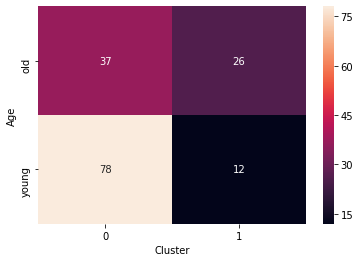

In [91]:
cm = confusion_matrix(df_orl["subjID_label"].values, agg_cluster_all.labels_)

fig, ax = plt.subplots()
sn.heatmap(cm, ax=ax, annot=cm)

ax.set_xlabel("Cluster")
ax.set_ylabel("Age")
ax.set_yticklabels(df_orl["subjID"].astype("category").cat.categories)
plt.show()

#### Hierarchical Agglomerative (k=3)
With three clusters it is somewhat improved. Cluster 2 contains mostly young, and cluster 1 has mostly old. We also see a cluster where the two are evenly split, which could indicate that there is a sizeable overlap between the two groups. 

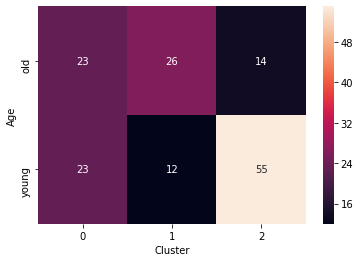

In [88]:
cm = confusion_matrix(df_orl["subjID_label"].values, agg_cluster3.labels_)

fig, ax = plt.subplots()
sn.heatmap(cm, ax=ax, annot=cm)

ax.set_xlabel("Cluster")
ax.set_ylabel("Age")
ax.set_yticklabels(df_orl["subjID"].astype("category").cat.categories)
plt.show()

# Conclusion
